In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

import plotly as py

In [83]:
#Set Random Seed
np.random.seed(42)

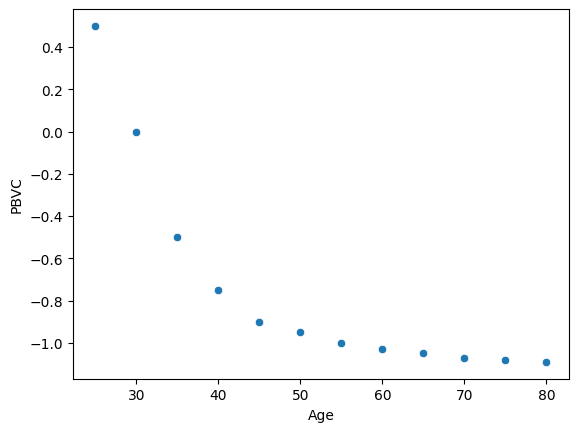

In [84]:
#Create age model
#Use sns to create a PVBC/year vs age plot
#Use the plot to create a polynomial regression model

#Points
#Age 25: 0.5
#Age 30: 0
#Age 35: -0.5
#Age 40: -0.75
#Age 45: -0.9
#Age 50: -0.95
#Age 55: -1
#Age 60: -1.03
#Age 65: -1.05
#Age 70: -1.07
#Age 75: -1.08
#Age 80: -1.09

#Create a dataframe
age = [25,30,35,40,45,50,55,60,65,70,75,80]
pbvc = [0.5,0,-0.5,-0.75,-0.9,-0.95,-1,-1.03,-1.05,-1.07,-1.08,-1.09]
age_model_df = pd.DataFrame({'Age':age,'PBVC':pbvc})

#Create a scatter plot
sns.scatterplot(x='Age',y='PBVC',data=age_model_df)
plt.show()


0.9973583791116859


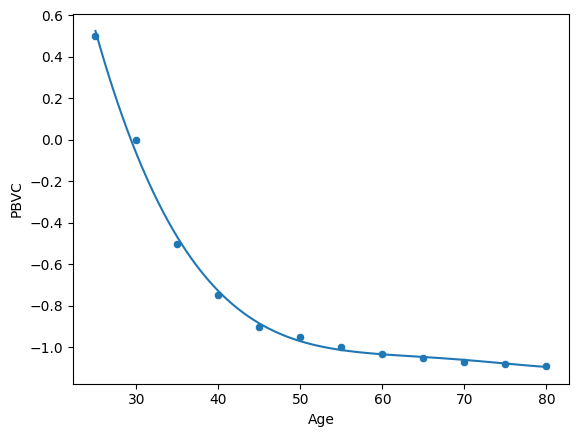

In [95]:
#Use sklearn to create a polynomial regression model
#Create a pipeline
degree = 4
age_model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
age_model.fit(age_model_df[['Age']].values,age_model_df['PBVC'])

#Print score
print(age_model.score(age_model_df[['Age']].values,age_model_df['PBVC']))

#Create a scatter plot
sns.scatterplot(x='Age',y='PBVC',data=age_model_df)
x = np.linspace(25,80,100)
y = age_model.predict(x.reshape(-1,1))
plt.plot(x,y)
plt.show()

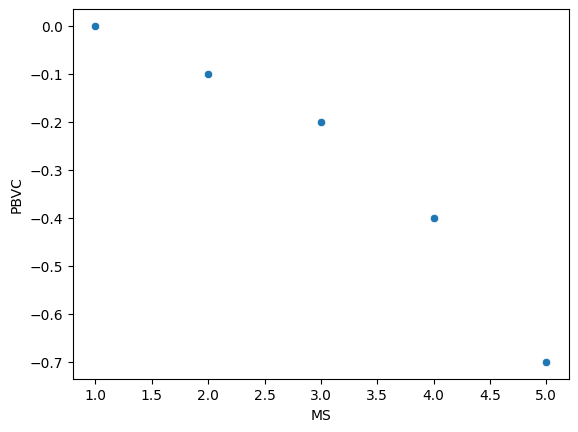

In [86]:
#Create an MS model
#Use sns to create a PVBC/year vs MS plot, where MS is a range from 1 to 5 indicating the severity of MS
#Use the plot to create a polynomial regression model

#Points
#MS 1: 0
#MS 2: -0.1
#MS 3: -0.2
#MS 4: -0.4
#MS 5: -0.7

#Create a dataframe
ms = [1,2,3,4,5]
pbvc = [0,-0.1,-0.2,-0.4,-0.7]
ms_model_df = pd.DataFrame({'MS':ms,'PBVC':pbvc})

#Create a scatter plot
sns.scatterplot(x='MS',y='PBVC',data=ms_model_df)
plt.show()

#Come back and implement EDSS model
#Expanded Disability Status Scale (EDSS) is a method of quantifying disability in multiple sclerosis

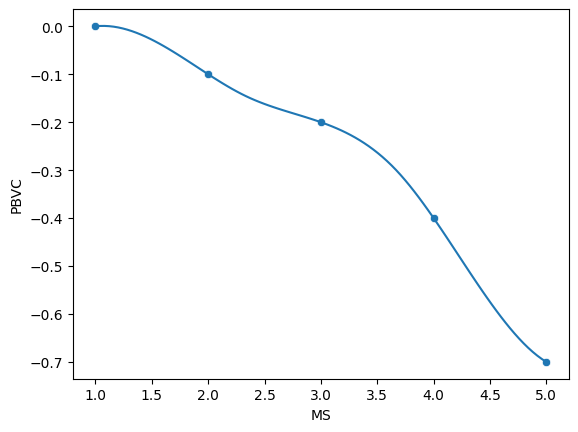

In [87]:
#Create a polynomial regression model
degree = 2
#ms_model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
ms_model = make_pipeline(SplineTransformer(n_knots=4,degree=3),LinearRegression())
ms_model.fit(ms_model_df[['MS']].values,ms_model_df['PBVC'])

#Create a scatter plot
sns.scatterplot(x='MS',y='PBVC',data=ms_model_df)
x = np.linspace(1,5,100)
y = ms_model.predict(x.reshape(-1,1))
plt.plot(x,y)
plt.show()

In [88]:
#Create a acquisition/methodology model
#Use sns to create a error vs acquisition/methodology dictionary

acq_method = {'IRSPGR':[-0.5,0.5],'MPRAGE':[-0.3,0.3],'MP2RAGE':[-0.4,0.4]}

In [89]:
patient_1 = PBVC(age_model,ms_model,acq_method)
patient_1.set_age(40)
patient_1.set_ms(3)
patient_1.set_acq_method('IRSPGR')

patient_1.pbvc()
print(patient_1)

PBVC Estimate: -0.9288170162914138 
 Error Bars: -0.5, 0.5
